In [10]:
pip install pandas matplotlib seaborn

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/9f/6e/264673e64001b99d747aff5a288eca82826c024437a3694e19aed1decf46/matplotlib-3.10.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/a1/35/c2de8823211d07e8a79ab018ef03960716c5dff6f4d5bff5af87fd682992/contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/39/5d/99a164057dd1fc345027113909022877e5fd1b649b2357d18a2a03

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração do estilo dos gráficos
sns.set(style="whitegrid")

# Defina os caminhos dos arquivos CSV
populacao_path = 'data/populacao/br_ibge_populacao_municipio.csv'
diretorios_path = 'data/populacao/br_bd_diretorios_brasil_municipio.csv'

# Leitura dos arquivos CSV
populacao_df = pd.read_csv(populacao_path)
diretorios_df = pd.read_csv(diretorios_path)

In [26]:
# Realizando a junção das tabelas
merged_df = pd.merge(populacao_df, diretorios_df, on='id_municipio', how='inner')

# Iterar sobre todas as colunas e imprimir seus nomes
print("Colunas do DataFrame combinado:")
for col in merged_df.columns:
    print(col)

Colunas do DataFrame combinado:
ano
sigla_uf_x
id_municipio
populacao
id_municipio_6
id_municipio_tse
id_municipio_rf
id_municipio_bcb
nome
capital_uf
id_comarca
id_regiao_saude
nome_regiao_saude
id_regiao_imediata
nome_regiao_imediata
id_regiao_intermediaria
nome_regiao_intermediaria
id_microrregiao
nome_microrregiao
id_mesorregiao
nome_mesorregiao
id_regiao_metropolitana
nome_regiao_metropolitana
ddd
id_uf
sigla_uf_y
nome_uf
nome_regiao
amazonia_legal
centroide


In [ ]:
# Filtrando as colunas relevantes
filtered_df = merged_df[['sigla_uf_x','nome', 'populacao', 'ano']]

# Exibir as primeiras linhas do DataFrame resultante
print("Dados Filtrados:")
print(filtered_df.head())

# Descrição do DataFrame filtrado
print("\nDescrição dos Dados Filtrados:")
print(filtered_df.describe(include='all'))

# Informações sobre os tipos de dados
print("\nInformações sobre o DataFrame Filtrado:")
print(filtered_df.info())

Dados Filtrados:
  sigla_uf_x                   nome  populacao   ano
0         RO  Alta Floresta D'Oeste    31981.0  1991
1         RO  Alta Floresta D'Oeste    34768.0  1992
2         RO  Alta Floresta D'Oeste    37036.0  1993
3         RO  Alta Floresta D'Oeste    39325.0  1994
4         RO  Alta Floresta D'Oeste    41574.0  1995

Descrição dos Dados Filtrados:
       sigla_uf_x          nome     populacao            ano
count      174387        174387  1.738530e+05  174387.000000
unique         27          5297           NaN            NaN
top            MG  São Domingos           NaN            NaN
freq        26778           155           NaN            NaN
mean          NaN           NaN  3.371568e+04    2006.789520
std           NaN           NaN  2.003161e+05       9.115752
min           NaN           NaN  6.520000e+02    1991.000000
25%           NaN           NaN  5.316000e+03    1999.000000
50%           NaN           NaN  1.105000e+04    2007.000000
75%           NaN      

C:\Users\tulio\AppData\Local\Temp\ipykernel_10024\2704302662.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_municipios, x='nome', y='populacao', palette='viridis')


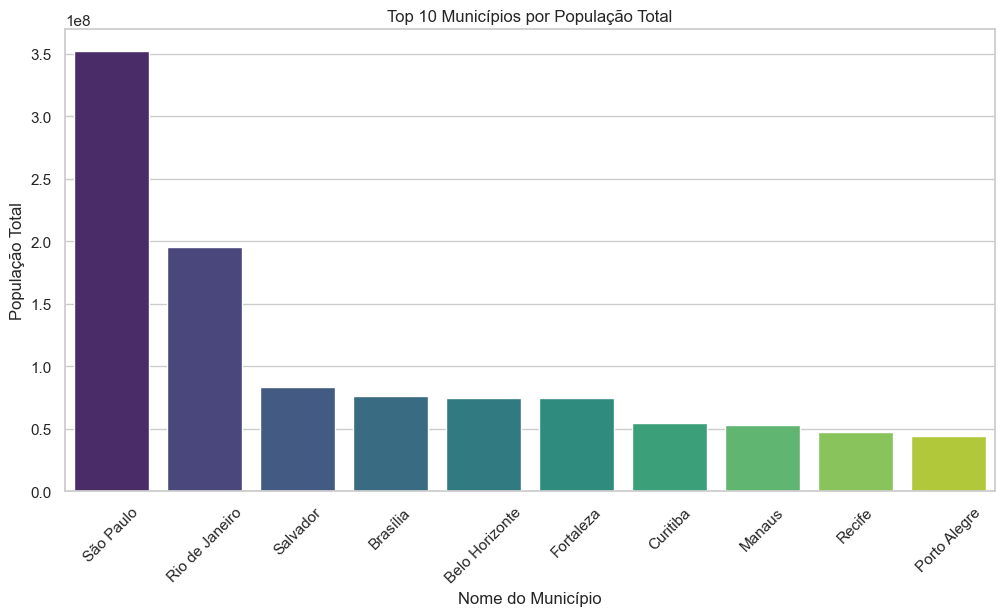

In [28]:
# Gráfico 1: População total por município
plt.figure(figsize=(12, 6))
populacao_total = filtered_df.groupby('nome')['populacao'].sum().reset_index()
top_municipios = populacao_total.sort_values(by='populacao', ascending=False).head(10)
sns.barplot(data=top_municipios, x='nome', y='populacao', palette='viridis')
plt.title('Top 10 Municípios por População Total')
plt.xlabel('Nome do Município')
plt.ylabel('População Total')
plt.xticks(rotation=45)
plt.show()

C:\Users\tulio\AppData\Local\Temp\ipykernel_10024\1400723434.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=populacao_por_uf, x='sigla_uf_x', y='populacao', palette='magma')


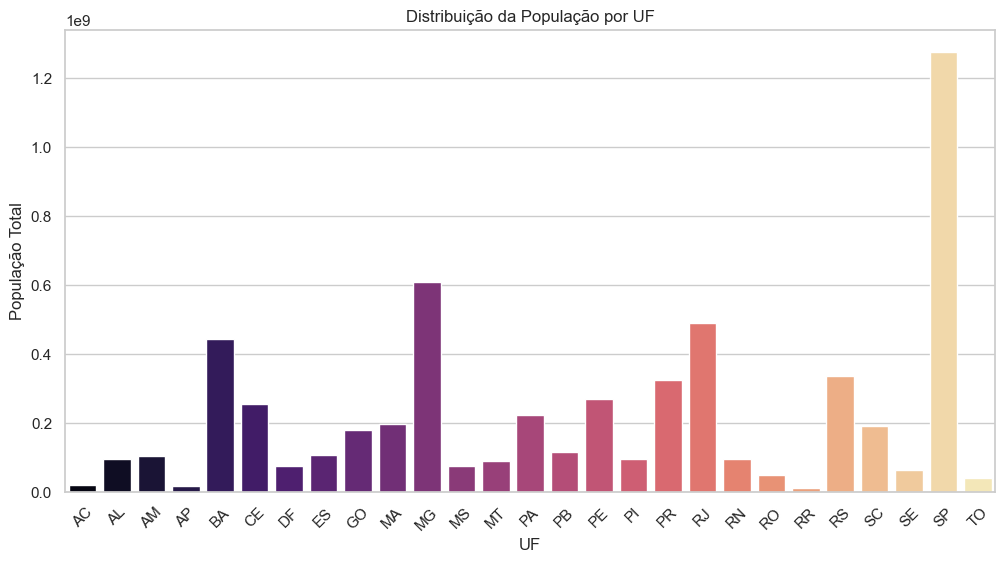

In [30]:
# Gráfico 2: Distribuição da população por UF
plt.figure(figsize=(12, 6))
populacao_por_uf = filtered_df.groupby('sigla_uf_x')['populacao'].sum().reset_index()
sns.barplot(data=populacao_por_uf, x='sigla_uf_x', y='populacao', palette='magma')
plt.title('Distribuição da População por UF')
plt.xlabel('UF')
plt.ylabel('População Total')
plt.xticks(rotation=45)
plt.show()

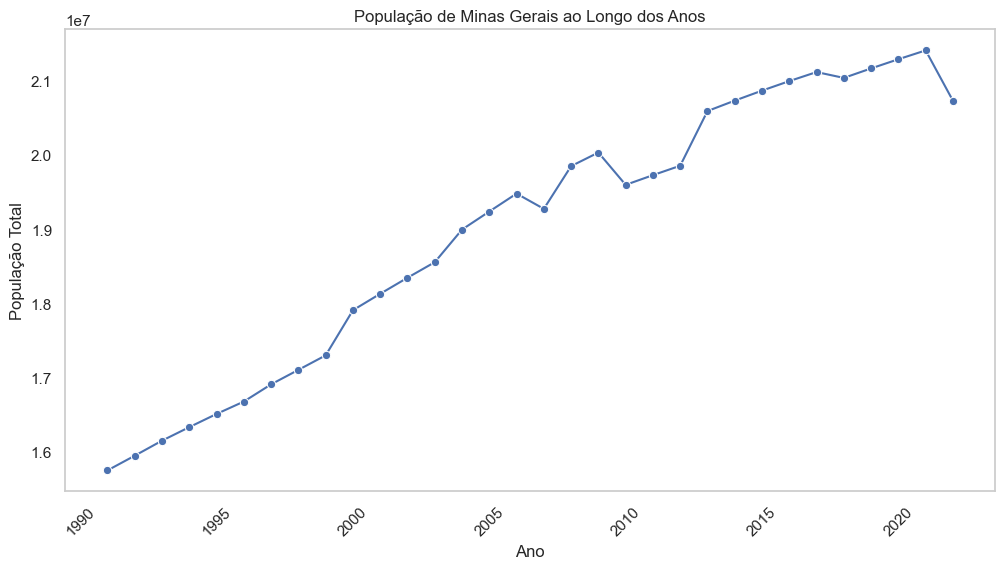

In [38]:
# Filtrando os dados para Minas Gerais
minas_gerais_df = merged_df[merged_df['sigla_uf_x'] == 'MG']
# Agrupando os dados por ano e somando a população
populacao_mg = minas_gerais_df.groupby('ano')['populacao'].sum().reset_index()
# Gráfico: População de Minas Gerais ao longo dos anos
plt.figure(figsize=(12, 6))
sns.lineplot(data=populacao_mg, x='ano', y='populacao', marker='o')
plt.title('População de Minas Gerais ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('População Total')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [32]:
# Análise de dados
print("\nAnálise dos Dados Filtrados:")
print("1. A tabela filtrada contém os municípios, suas populações, anos de pesquisa e UFs.")
print("2. Os 10 municípios mais populosos estão identificados no primeiro gráfico.")
print("3. A distribuição da população por UF é apresentada no segundo gráfico.")
print("4. A variação da população ao longo dos anos para um município específico é mostrada no terceiro gráfico.")


Análise dos Dados Filtrados:
1. A tabela filtrada contém os municípios, suas populações, anos de pesquisa e UFs.
2. Os 10 municípios mais populosos estão identificados no primeiro gráfico.
3. A distribuição da população por UF é apresentada no segundo gráfico.
4. A variação da população ao longo dos anos para um município específico é mostrada no terceiro gráfico.
